<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/INTRUSION_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRUSION DETECTION**

In [ ]:
#importing required packages for this module
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
import json
jsonpath=Path('/content/drive/MyDrive/Mini Project/datasetnew.json')
with jsonpath.open('r',encoding='utf-8')as dat_f:
  dat=json.loads(dat_f.read())
  df=pd.json_normalize(dat)
  df.to_csv('/content/drive/MyDrive/Mini Project/logdataset1.csv',encoding='utf-8',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Mini Project/newlogdataset.csv")
data

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,interface_ip,segment_id,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4171,322,nvd,2019-11-29T12:11:06.587Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,c9845596-2a1c-40fa-ba73-1a3cb250e988,3
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4181,322,nvd,2019-11-29T12:11:06.589Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,a3e78117-f02b-4a58-9194-39b8c153b1fb,3
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4138,322,nvd,2019-11-29T12:11:06.413Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4128,322,nvd,2019-11-29T12:11:06.406Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,9c819b01-6e5c-4985-92a6-132c98cb6f63,3
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4227,322,nvd,2019-11-29T12:11:06.41Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.144Z,40,CVE-2016-0995,237,nvd,2019-11-27T03:09:30.037Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,d1634d4f-c262-4484-9a10-3939743a8ca5,3
2496,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-1031,237,nvd,2019-11-27T03:09:30.207Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,9ab8684a-bec1-4dd4-8688-e698f107d038,3
2497,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-4284,237,nvd,2019-11-27T03:09:30.212Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,85110b00-ce52-4cfd-9b38-1ff1ea9452ed,3
2498,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-4284,237,nvd,2019-11-27T03:09:30.212Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,85110b00-ce52-4cfd-9b38-1ff1ea9452ed,3


In [ ]:
ds=data[['process_path','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:
ds

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],40,27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],40,27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0


In [ ]:
inp=ds.drop(["report_score"],axis=1)
inp

,process_path,alert_type,@timestamp,watchlist_id,tags,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],27.0
...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0


In [ ]:
inp.to_csv('datafile.csv')

In [ ]:
ds.dtypes

process_path       object
alert_type         object
@timestamp         object
watchlist_id       object
tags               object
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df=ds

**PREPROCESSING**

Object datatype is converted into integer

In [ ]:
#Preprocessing
#applying the labelencoder for datatype convertion
from sklearn.preprocessing  import LabelEncoder
label_encoder=LabelEncoder()
df['process_path']=label_encoder.fit_transform(df['process_path'].astype(str))
df['alert_type']=label_encoder.fit_transform(df['alert_type'].astype(str))
df['@timestamp']=label_encoder.fit_transform(df['@timestamp'].astype(str))
df['watchlist_id']=label_encoder.fit_transform(df['watchlist_id'].astype(str))
df['tags']=label_encoder.fit_transform(df['tags'].astype(str))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df.dtypes

process_path        int64
alert_type          int64
@timestamp          int64
watchlist_id        int64
tags                int64
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,4,0,35,23,0,40,27.0
1,4,0,35,25,0,40,27.0
2,4,0,35,20,0,40,27.0
3,4,0,35,19,0,40,27.0
4,4,0,35,28,0,40,27.0
...,...,...,...,...,...,...,...
2495,4,0,1,10,0,40,27.0
2496,4,0,0,17,0,40,27.0
2497,4,0,0,32,0,40,27.0
2498,4,0,0,32,0,40,27.0


In [ ]:
import pickle


In [ ]:
# save the model to disk
filename = 'labelencodermodeln1.pkl'
pickle.dump(label_encoder, open(filename, 'wb'))

In [ ]:
df

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,4,0,35,23,0,40,27.0
1,4,0,35,25,0,40,27.0
2,4,0,35,20,0,40,27.0
3,4,0,35,19,0,40,27.0
4,4,0,35,28,0,40,27.0
...,...,...,...,...,...,...,...
2495,4,0,1,10,0,40,27.0
2496,4,0,0,17,0,40,27.0
2497,4,0,0,32,0,40,27.0
2498,4,0,0,32,0,40,27.0


In [ ]:
df.loc[(df['report_score'] >=10) & (df['report_score'] <= 39), 'class'] = "LowRisk"  
df.loc[(df['report_score'] >=40) & (df['report_score'] <= 69), 'class'] = "MediumRisk" 
df.loc[(df['report_score'] >=70) & (df['report_score'] <= 89), 'class'] = "HighRisk" 
df.loc[(df['report_score'] >=90) & (df['report_score'] <= 100), 'class'] = "Critical" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='HighRisk':
        return 2
    elif report_score=='Critical':
        return 3

In [ ]:
df['class'] = df['class'].apply(cdc)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,4,0,35,23,0,40,27.0,1
1,4,0,35,25,0,40,27.0,1
2,4,0,35,20,0,40,27.0,1
3,4,0,35,19,0,40,27.0,1
4,4,0,35,28,0,40,27.0,1
...,...,...,...,...,...,...,...,...
2495,4,0,1,10,0,40,27.0,1
2496,4,0,0,17,0,40,27.0,1
2497,4,0,0,32,0,40,27.0,1
2498,4,0,0,32,0,40,27.0,1


In [ ]:
df.dtypes

process_path        int64
alert_type          int64
@timestamp          int64
watchlist_id        int64
tags                int64
report_score        int64
alert_severity    float64
class               int64
dtype: object

In [ ]:
x=df.drop(["class","report_score"],axis=1)
y=df["class"]

Scaling Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)


Splitting the model

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[1.        , 0.        , 0.68571429, 0.71794872, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.8       , 0.84615385, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.8       , 0.61538462, 0.        ,
        0.33333333],
       ...,
       [1.        , 0.        , 0.8       , 0.82051282, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.97142857, 0.79487179, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.91428571, 0.25641026, 0.        ,
        0.33333333]])

**MODELS** 

In [ ]:

#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)


In [ ]:

sv.score(x_test,y_test)

0.898

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)

In [ ]:
knn_clf.score(x_test,y_test)

0.894

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)



In [ ]:
rf.score(x_test,y_test)

0.906

In [ ]:
# save the model to disk
filename = 'randomforestmodelc1'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.906


In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.832

In [ ]:
#Applying logistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)



In [ ]:
lr.score(x_test,y_test)

0.86

**MODEL EVALUATION**

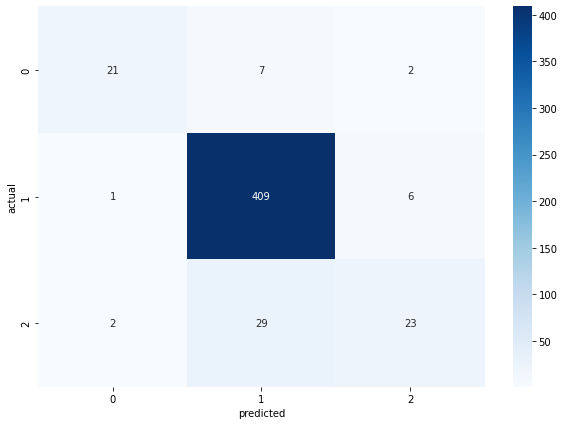

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

**CLASSIFICATION REPORT**

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.92      0.98      0.95       416
           2       0.74      0.43      0.54        54

    accuracy                           0.91       500
   macro avg       0.85      0.70      0.76       500
weighted avg       0.90      0.91      0.90       500



**BALANCING THE DATASET**

In [ ]:
df["class"].value_counts()

1    2145
2     214
0     136
3       5
Name: class, dtype: int64

In [ ]:
low=df[df["class"]==0]
medium=df[df["class"]==1]
avg=df[df["class"]==2]
high=df[df["class"]==3]

In [ ]:
n=len(medium)

In [ ]:
low_over = low.sample(n, replace=True)
avg_over = avg.sample(n, replace=True)
high_over = high.sample(n, replace=True)

In [ ]:
low_over.shape
avg_over.shape
high_over.shape

(2145, 8)

In [ ]:
data_over = pd.concat([low_over,medium,avg_over,high_over], axis=0)

In [ ]:
data_over["class"].value_counts()

0    2145
1    2145
2    2145
3    2145
Name: class, dtype: int64

In [ ]:
data_over

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
1300,4,0,27,21,0,28,18.9,0
950,4,0,34,26,0,30,27.0,0
137,4,0,31,18,0,28,18.9,0
1444,4,0,27,21,0,28,18.9,0
1156,4,0,27,21,0,28,18.9,0
...,...,...,...,...,...,...,...,...
902,4,0,32,8,0,99,27.0,3
902,4,0,32,8,0,99,27.0,3
2383,1,0,20,2,0,95,67.5,3
2383,1,0,20,2,0,95,67.5,3


In [ ]:
data_over=data_over.sample(frac=1)

In [ ]:
x=data_over.drop(["class","report_score"],axis=1)
y=data_over["class"]

In [ ]:
x.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

**SCALING THE FEATURES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)

**SPLITTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[0.25      , 0.        , 0.57142857, 0.05128205, 0.        ,
        1.        ],
       [1.        , 0.        , 0.74285714, 0.82051282, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.8       , 0.71794872, 0.        ,
        0.33333333],
       ...,
       [1.        , 0.        , 0.74285714, 0.82051282, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.91428571, 0.20512821, 0.        ,
        0.33333333],
       [1.        , 0.        , 0.77142857, 0.53846154, 0.        ,
        0.2       ]])

**MODELS**

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)
clf.score(x_test,y_test)

0.6258741258741258

In [ ]:
#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'poly',degree=3, gamma='auto')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)
sv.score(x_test,y_test)

0.6666666666666666

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)
knn_clf.score(x_test,y_test)

0.833916083916084

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)
y_predrf=rf.predict(x_test)
rf1.score(x_test,y_test)


0.8601398601398601

In [ ]:
# save the model to disk
filename = 'randomforest1model1.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [ ]:
#Applying logistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
lr.score(x_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6194638694638694

In [ ]:
#Applying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predlr=dt.predict(x_test)
dt.score(x_test,y_test)



0.8601398601398601

In [ ]:
filename = 'decisionmodel.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [ ]:
loaded_model_random = pickle.load(open('decisionmodel.pkl', 'rb'))
result = loaded_model_random.score(x_test, y_test)
print(result)

0.8601398601398601


**MODEL EVALUATION**

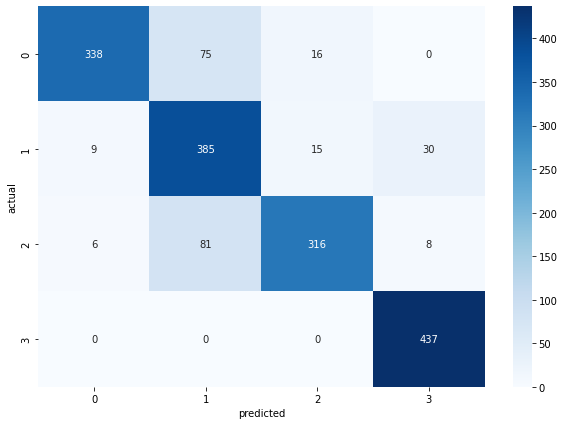

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf1.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

**CLASSIFICATION REPORT**

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       429
           1       0.71      0.88      0.79       439
           2       0.91      0.77      0.83       411
           3       0.92      1.00      0.96       437

    accuracy                           0.86      1716
   macro avg       0.87      0.86      0.86      1716
weighted avg       0.87      0.86      0.86      1716



**PREDICTION**

In [ ]:
loaded_model_le = pickle.load(open('labelencodermodeln1.pkl', 'rb'))


In [ ]:
loaded_model_random = pickle.load(open('randomforest1model1.pkl', 'rb'))
result = loaded_model_random.score(x_test, y_test)
print(result)

0.8601398601398601


In [ ]:
input_pred=[["c:\windows\system32\cmd.exe","watchlist.hit.ingress.process","2019-11-29T11:58:13.296Z","d67c0501-339c-4f3c-885c-4bdf001df2fe","['carbonblack']",57.375]]

In [ ]:
def prediction(input_pred):
    inputw=pd.DataFrame(input_pred,columns =['process_path','alert_type','@timestamp','watchlist_id','tags','alert_severity'])
    edit=pd.concat([inputw,inp],axis=0)
    edit.reset_index(inplace=True, drop=True)
    edit["process_path"]=loaded_model_le.fit_transform(edit["process_path"])
    edit["alert_type"]=loaded_model_le.fit_transform(edit["alert_type"])
    edit["@timestamp"]=loaded_model_le.fit_transform(edit["@timestamp"])
    edit["watchlist_id"]=loaded_model_le.fit_transform(edit["watchlist_id"])
    edit["tags"]=loaded_model_le.fit_transform(edit["tags"])
    inputt=edit.head(1)
    print(inputt)
    return loaded_model_random.predict(inputt)
    




In [ ]:
prediction(input_pred)

   process_path  alert_type  @timestamp  watchlist_id  tags  alert_severity
0             2           0          33            39     0          57.375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([2])

In [ ]:
arr=prediction(input_pred)
def classpred(arr):
  if arr==[0] :
    return "Low risk"
  elif arr==[1] :
    return "Medium risk"
  elif arr==[2] :
    return "High Risk"
  else :
    return "Critical"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
classpred(arr)

'High Risk'